In [1]:
from fastai.vision import *

In [2]:
PATH_ts1 = Path('../data/CombinedImages')

In [3]:
#matrix of cancer cell images
[x for x in PATH_ts1.iterdir()]

[PosixPath('../data/CombinedImages/.DS_Store'),
 PosixPath('../data/CombinedImages/Malign'),
 PosixPath('../data/CombinedImages/._.DS_Store'),
 PosixPath('../data/CombinedImages/Not_Malign'),
 PosixPath('../data/CombinedImages/models')]

In [4]:
PATH_ts1

PosixPath('../data/CombinedImages')

In [5]:
#images transformed nd vertically flipped
tfms = get_transforms(flip_vert = True)

In [11]:
#image matrix loaded
data = (ImageItemList.from_folder(PATH_ts1) 
        .random_split_by_pct(valid_pct=0.1)
        .label_from_folder()
        .transform(tfms, size=600)
        .databunch(bs=16)
        .normalize(imagenet_stats))

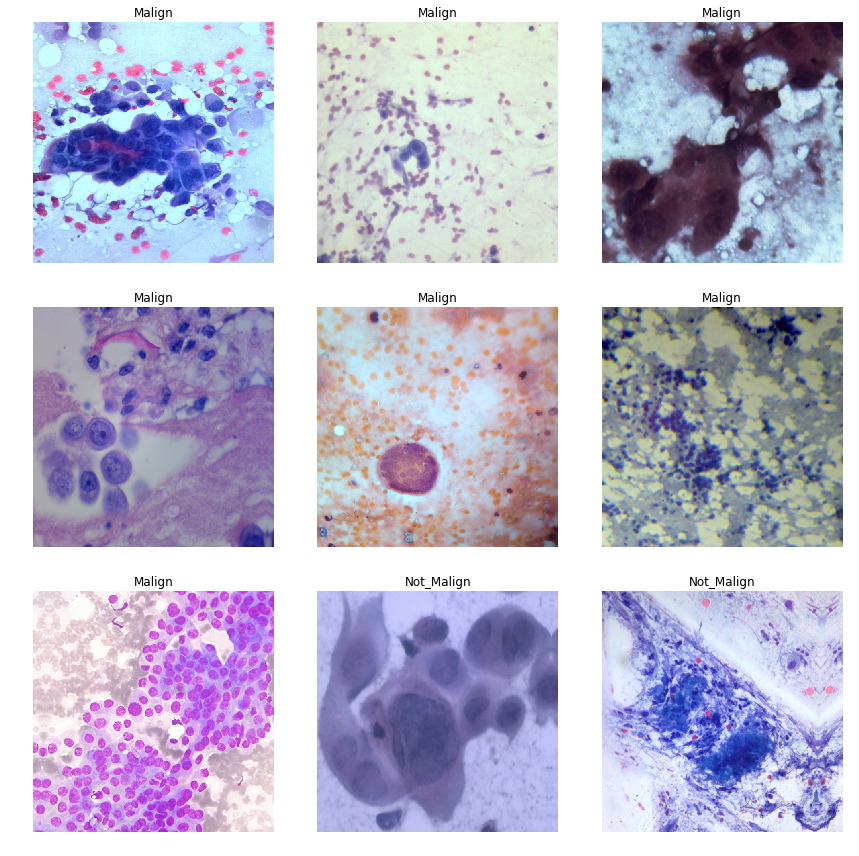

In [7]:
data.show_batch(rows=3)

In [8]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Check https://docs.fast.ai/training.html the fastai docs

In [9]:
#resnet18-residual neural network of 18 layers created
learn = create_cnn(data, models.resnet18, metrics =accuracy, callback_fns=ShowGraph)

In [25]:
learn.fit_one_cycle(1,1e-2)
#learn.save('mini_train')

epoch,train_loss,valid_loss,accuracy
1,0.785482,0.738169,0.672897


In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


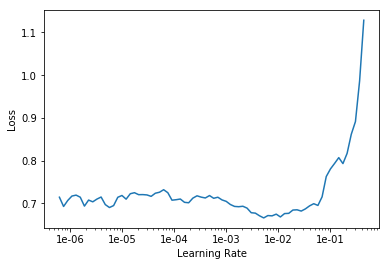

In [28]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy
1,0.791029,0.574868,0.747664
2,0.664071,0.626363,0.691589
3,0.590448,0.530073,0.761682
4,0.578502,0.517654,0.738318
5,0.543427,0.561324,0.728972
6,0.593499,0.493707,0.742991
7,0.553835,0.518122,0.747664
8,0.519438,0.505957,0.780374
9,0.519020,0.526817,0.771028
10,0.519916,0.443634,0.785047


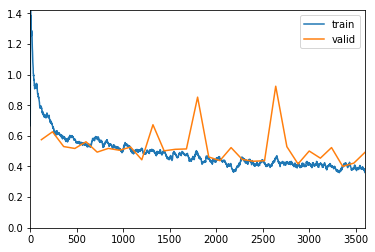

In [30]:
#Trainging-30 epochs trained 
learn.fit(epochs = 30, lr=[0.001, 0.003, 0.01])

In [31]:
#training weights stored in "30it_0401"
learn.save('30it_0401')

In [10]:
learn.load('30it_0401')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (1919 items)
[Category Malign, Category Malign, Category Malign, Category Malign, Category Malign]...
Path: ../data/CombinedImages
x: ImageItemList (1919 items)
[Image (3, 1024, 1360), Image (3, 480, 640), Image (3, 768, 1024), Image (3, 800, 1280), Image (3, 480, 640)]...
Path: ../data/CombinedImages;

Valid: LabelList
y: CategoryList (213 items)
[Category Malign, Category Not_Malign, Category Malign, Category Malign, Category Not_Malign]...
Path: ../data/CombinedImages
x: ImageItemList (213 items)
[Image (3, 470, 648), Image (3, 768, 1024), Image (3, 1024, 1360), Image (3, 480, 640), Image (3, 571, 952)]...
Path: ../data/CombinedImages;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2

In [18]:
#random test image to check prediction command  
img = open_image('../data/CombinedImages/Not_Malign/136989_pc 1.jpg')
output = str(learn.predict(img))

In [19]:
ans = output.split(' ')[1]

In [20]:
ans[:-1] 

'Not_Malign'

In [12]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (1919 items)
[Category Malign, Category Malign, Category Malign, Category Malign, Category Malign]...
Path: ../data/CombinedImages
x: ImageItemList (1919 items)
[Image (3, 1024, 1360), Image (3, 480, 640), Image (3, 800, 1280), Image (3, 480, 640), Image (3, 1811, 1944)]...
Path: ../data/CombinedImages;

Valid: LabelList
y: CategoryList (213 items)
[Category Malign, Category Not_Malign, Category Not_Malign, Category Not_Malign, Category Not_Malign]...
Path: ../data/CombinedImages
x: ImageItemList (213 items)
[Image (3, 1200, 1600), Image (3, 576, 640), Image (3, 2448, 3264), Image (3, 480, 640), Image (3, 3072, 4080)]...
Path: ../data/CombinedImages;

Test: None